Import needed libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pyneb as pn

2024-05-31 15:03:55.489260: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/christophemorisset/anaconda3/envs/ML/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Read observation in the obs object

In [2]:
obs = pn.Observation(obsFile='./observations1.dat', fileFormat='lines_in_rows', err_default=0.05)

Add 100 synthetic observations, based on the observed intensities and the errors on them (here default value is 5%)

In [3]:
obs.addMonteCarloObs(N=100)

Reset Hbeta to 100, it hase no error by definition

In [4]:
l = obs.getLine(label='H1r_4861A')
l.obsIntens = np.ones_like(l.obsIntens) * 100

Correct observations from reddening

In [5]:
obs.def_EBV(label1='H1r_6563A', label2='H1r_4861A', r_theo=2.85)

In [6]:
obs.correctData(normWave=4861.)

Have a look at the line intensities: 101 values for each one (the first value is the original one).

In [7]:
obs.printIntens()

S4_10.5m      4.076    5.241    4.510    3.434    4.903    4.166    4.212    3.748    4.041    3.673    3.701    3.948    4.346    4.501    4.426    3.982    4.352    3.578    4.288    5.300    4.090    5.046    5.608    5.015    3.191    3.937    3.986    4.888    4.400    3.734    3.850    3.715    4.433    4.568    5.144    4.503    4.083    3.917    6.292    4.213    3.138    3.271    4.236    3.595    3.479    3.939    3.883    4.244    3.213    4.328    4.503    4.730    5.188    2.787    4.469    3.227    3.997    2.849    5.652    4.307    3.595    3.361    4.521    4.046    4.539    4.205    3.824    4.100    5.671    3.985    4.603    4.284    3.595    3.962    3.967    4.477    3.923    4.245    4.055    4.009    3.750    3.751    4.389    4.257    4.127    3.733    4.481    2.434    3.814    3.088    4.040    4.512    3.621    3.956    3.442    4.082    4.175    3.559    5.174    3.888    3.595
Ne2_12.8m     4.826    6.199    5.115    4.143    5.445    5.157    4.929    5.0

Plot the histogram of [OIII]/H$\beta$

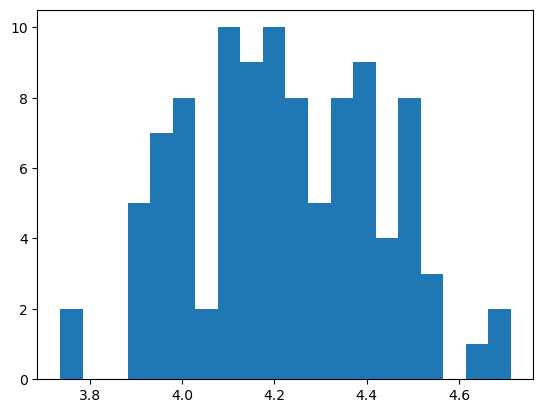

In [8]:
f, ax = plt.subplots()
ax.hist(obs.getIntens()['O3_5007A']/obs.getIntens()['H1r_4861A'], bins=20);

Instantiate the diag object to compute the diagnostics

In [9]:
diag = pn.Diagnostics()

Consider all the diagnostics available given the observed lines

In [10]:
diag.addDiagsFromObs(obs)

Have a look at the diagnostics

In [11]:
diag.diags

{'[NII] 5755/6548': ('N2', 'L(5755)/L(6548)', 'RMS([E(6548), E(5755)])'),
 '[NII] 5755/6584': ('N2', 'L(5755)/L(6584)', 'RMS([E(6584), E(5755)])'),
 '[NII] 5755/6584+': ('N2',
  'L(5755)/(L(6548)+L(6584))',
  'RMS([E(6548)*L(6548)/(L(6548)+L(6584)), E(6584)*L(6584)/(L(6584)+L(6548)), E(5755)])'),
 '[OII] 3726/3729': ('O2', 'L(3726)/L(3729)', 'RMS([E(3729), E(3726)])'),
 '[OII] 3727+/7325+': ('O2',
  '(L(3726)+L(3729))/(B("7319A+")+B("7330A+"))',
  'RMS([E(3726)*L(3726)/(L(3726)+L(3729)), E(3729)*L(3729)/(L(3726)+L(3729)),BE("7319A+")*B("7319A+")/(B("7319A+")+B("7330A+")),BE("7330A+")*B("7330A+")/(B("7319A+")+B("7330A+"))])'),
 '[OIII] 4363/5007': ('O3', 'L(4363)/L(5007)', 'RMS([E(5007), E(4363)])'),
 '[SII] 6731/6716': ('S2', 'L(6731)/L(6716)', 'RMS([E(6716), E(6731)])'),
 '[SII] 4069/4076': ('S2', 'L(4069)/L(4076)', 'RMS([E(4069), E(4076)])'),
 '[SII] 4072+/6720+': ('S2',
  '(L(4069)+L(4076))/(L(6716)+L(6731))',
  'RMS([E(6716)*L(6716)/(L(6716)+L(6731)), E(6731)*L(6731)/(L(6716)+L(673

Get a list of all the atoms string involved in the observations

In [12]:
all_atoms = obs.getUniqueAtoms()

In [13]:
all_atoms

array(['Ar3', 'H1r', 'N2', 'Ne2', 'Ne3', 'O1', 'O2', 'O3', 'S2', 'S3',
       'S4'], dtype='<U3')

Creat a dictionnary of all the emisGrids that are doable from the atoms previously defined.

In [14]:
emisDict = pn.getEmisGridDict(atom_list=all_atoms)

warng getEmisGridDict: Emission map not found: ./pypics//emis_H1r.pypic
warng _ManageAtomicData: atom data not available for H1
warng _ManageAtomicData: coll data not available for H1
warng getEmisGridDict: No H1r EmisGrid


In [15]:
emisDict

{'Ar3': <pyneb.core.emisGrid.EmisGrid at 0x7fca78b2a310>,
 'N2': <pyneb.core.emisGrid.EmisGrid at 0x7fca5ace9880>,
 'Ne2': <pyneb.core.emisGrid.EmisGrid at 0x7fca78b0d220>,
 'Ne3': <pyneb.core.emisGrid.EmisGrid at 0x7fca38c48ac0>,
 'O1': <pyneb.core.emisGrid.EmisGrid at 0x7fca78876a90>,
 'O2': <pyneb.core.emisGrid.EmisGrid at 0x7fca788761c0>,
 'O3': <pyneb.core.emisGrid.EmisGrid at 0x7fca5b62ef70>,
 'S2': <pyneb.core.emisGrid.EmisGrid at 0x7fca5b62e8e0>,
 'S3': <pyneb.core.emisGrid.EmisGrid at 0x7fca5b62ee50>,
 'S4': <pyneb.core.emisGrid.EmisGrid at 0x7fca5b62ec10>}

Plot the diagnostic diagram from the previously defined dictionnary. Only the 1rst value of the observations, the original one.

/Users/christophemorisset/Library/CloudStorage/GoogleDrive-chris.morisset@gmail.com/Mon Drive/Pro/PyNeb_devel/pyneb/core/diags.py:636: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(X, Y, diag_map, levels=[diag_value], colors=col, linestyles=style)


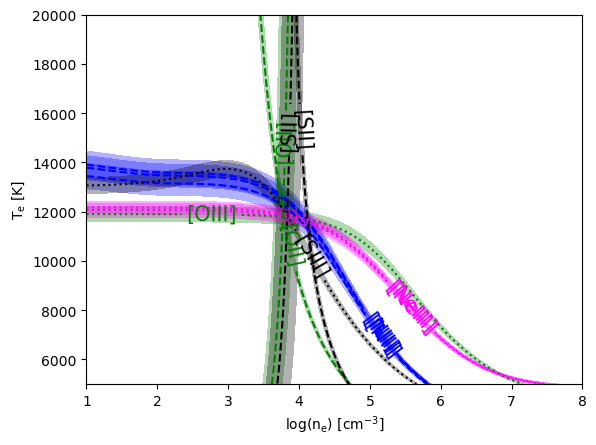

In [16]:
diag.plot(emis_grids=emisDict, obs=obs, i_obs=0)

Compute Te and Ne from the crossing points of every synthetic observations.

In [17]:
T_O3, N_S2 = diag.getCrossTemDen('[OIII] 4363/5007', '[SII] 6731/6716', obs=obs)

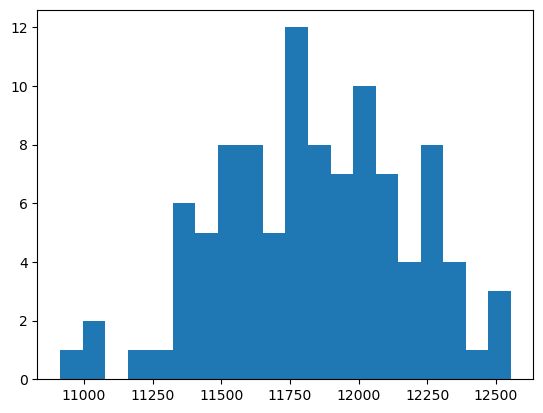

In [18]:
f, ax = plt.subplots()
ax.hist(T_O3, bins=20);

In [19]:
print(f'Te = {np.nanmedian(T_O3):.1f} K +/- {np.nanstd(T_O3):.1f}')
print(f'log Ne = {np.nanmedian(np.log10(N_S2)):.1f} +/- {np.nanstd(np.log10(N_S2)):.1f}  cm-3')

Te = 11825.1 K +/- 339.7
log Ne = 3.8 +/- 0.2  cm-3


The following needs to have keras, scikit and ai4neb installed. It used machine learning to accelerate the computation of electron temperature and density. 

In [40]:
import ai4neb

In [46]:
diag.getCrossTemDen?

Signature:
diag.getCrossTemDen(
    diag_tem,
    diag_den,
    value_tem=None,
    value_den=None,
    obs=None,
    i_obs=None,
    guess_tem=10000,
    tol_tem=1.0,
    tol_den=1.0,
    max_iter=5,
    maxError=0.001,
    start_tem=-1,
    end_tem=-1,
    start_den=-1,
    end_den=-1,
    use_ANN=False,
    limit_res=False,
    ANN=None,
)
Docstring:
Cross-converge the temperature and density derived from two sensitive line ratios, by inputting the quantity 
derived with one line ratio into the other and then iterating.
The temperature- and density-sensitive ratios can be input directly or as an Observation object

Parameters:

    diag_tem:   temperature-sensitive diagnostic line ratio
    diag_den:   density-sensitive diagnostic line ratio
    value_tem:  value of the temperature-sensitive diagnostic
    value_den:  value of the density-sensitive diagnostic
    obs:        np.Observation object. Values for observed temperature and density diagnostics are
                    taken 

In [72]:
N_MonteCarlo = 10000 # do not try this without use_ANN = True, this will take too much time
obs = pn.Observation(obsFile='./observations1.dat', fileFormat='lines_in_rows')
obs.addMonteCarloObs(N=10000)
l = obs.getLine(label='H1r_4861A')
l.obsIntens = np.ones_like(l.obsIntens) * 100
obs.def_EBV(label1='H1r_6563A', label2='H1r_4861A', r_theo=2.85)
obs.correctData(normWave=4861.)
diag = pn.Diagnostics()
diag.addDiagsFromObs(obs)

# Set the hyper parameters for the ANN. Default values should be OK
diag.ANN_init_kwargs = {'solver': 'lbfgs', 'activation': 'tanh', 'hidden_layer_sizes': (10, 30, 10), 'max_iter': 20000}
diag.ANN_inst_kwargs = {'RM_type': 'SK_ANN', 'verbose': False, 'scaling': True, 'use_log': True, 'random_seed': None}

# Set the ranges in Te and Ne for the training 
T_O3, N_S2 = diag.getCrossTemDen('[OIII] 4363/5007', '[SII] 6731/6716', obs=obs, use_ANN=True,
                                 start_tem=6000, end_tem=20000, start_den=1e2, end_den=1e6, limit_res=True)

In [73]:
print(f'Te = {np.nanmedian(T_O3):.1f} K +/- {np.nanstd(T_O3):.1f}')
print(f'log Ne = {np.nanmedian(np.log10(N_S2)):.2f} +/- {np.nanstd(np.log10(N_S2)):.2f}  cm-3')

Te = 11688.0 K +/- 784.9
log Ne = 3.84 +/- 0.48  cm-3


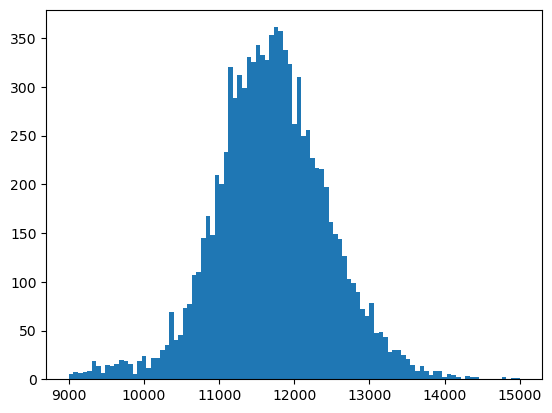

In [74]:
f, ax = plt.subplots()
ax.hist(T_O3, bins=np.linspace(9000, 15000, 100));

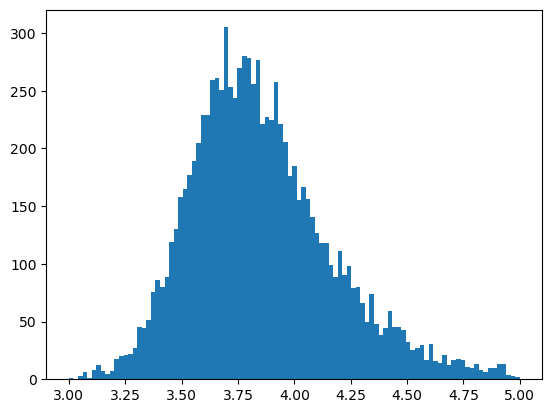

In [75]:
f, ax = plt.subplots()
ax.hist(np.log10(N_S2), bins=np.linspace(3, 5, 100));

Redo the computation of reddening correction using coherent H$\alpha$/H$\beta$, taking into account previously determined Te and Ne

Save the previously computed neural network

In [76]:
diag.ANN.save_RM('O3S2')

In [77]:
H1r = pn.RecAtom('H', 1)
r_theo = H1r.getEmissivity(T_O3, N_S2, wave=6563, product=False) / H1r.getEmissivity(T_O3, N_S2, wave=4861, product=False)
obs.def_EBV(label1='H1r_6563A', label2='H1r_4861A', r_theo=r_theo)
obs.correctData(normWave=4861.)
diag = pn.Diagnostics()
diag.addDiagsFromObs(obs)
# Read the previously computed neural network
ANN = ai4neb.manage_RM(RM_filename='O3S2')
# Now the run should be very fast as no training is done, only predictions
T_O3, N_S2 = diag.getCrossTemDen('[OIII] 4363/5007', '[SII] 6731/6716', obs=obs, use_ANN=True, ANN=ANN, limit_res=True)

In [78]:
print(f'Te = {np.nanmedian(T_O3):.1f} K +/- {np.nanstd(T_O3):.1f}')
print(f'log Ne = {np.nanmedian(np.log10(N_S2)):.2f} +/- {np.nanstd(np.log10(N_S2)):.2f}  cm-3')

Te = 11710.4 K +/- 790.4
log Ne = 3.84 +/- 0.48  cm-3


In [79]:
#Create a dictionnary that olds all the atom objects
atomDict = pn.getAtomDict(atom_list=all_atoms)
ion_ab_dic = {}
for line in obs.getSortedLines():
    atom = atomDict[line.atom]
    ion_ab_dic[line.label] = atom.getIonAbundance(line.corrIntens, T_O3, N_S2, to_eval=line.to_eval)

warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: atom data not available for H1
warng _ManageAtomicData: coll data not available for H1
warng _ManageAtomicData: rec data not available for Ne3
warng _ManageAtomicData: rec data not available for S2
warng _ManageAtomicData: rec data not available for S3
warng _ManageAtomicData: rec data not available for S4


In [26]:
ion_ab_dic

{'Ar3_7136A': array([2.18574665e-07, 1.68071875e-07, 2.07920132e-07, ...,
        2.02583752e-07, 2.14121795e-07, 2.82823398e-07]),
 'H1r_4861A': array([1., 1., 1., ..., 1., 1., 1.]),
 'H1r_6563A': array([1.00017371, 1.00034472, 1.0002187 , ..., 1.00024057, 1.00019612,
        1.00026016]),
 'N2_5755A': array([2.53445284e-06, 2.40832590e-06, 2.40523059e-06, ...,
        2.25145666e-06, 2.95489556e-06, 2.50986048e-06]),
 'N2_6548A': array([2.38420578e-06, 2.02288082e-06, 1.94155404e-06, ...,
        2.15814263e-06, 2.41060560e-06, 2.66937493e-06]),
 'N2_6584A': array([2.24392979e-06, 2.18316678e-06, 1.73065595e-06, ...,
        2.02635291e-06, 2.35528059e-06, 2.55109502e-06]),
 'Ne2_12.8m': array([5.70307732e-06, 5.33691819e-06, 4.19930723e-06, ...,
        5.51831418e-06, 5.09885870e-06, 6.87776995e-06]),
 'Ne3_15.6m': array([1.21835510e-05, 1.17195630e-05, 8.26176935e-06, ...,
        1.10492197e-05, 9.95002652e-06, 1.39145148e-05]),
 'Ne3_3869A': array([1.26145694e-05, 1.15255078e-05

Define O/H = O$^+$/H$^+$ + O$^{++}$/H$^+$, where O$^+$ is the mean value of the ionic abundances obtained from the two [OII]3726, 29 lines. No ICF is used here.

In [80]:
OH = ion_ab_dic['O3_5007A'] + 0.5*(ion_ab_dic['O2_3726A'] + ion_ab_dic['O2_3729A'])

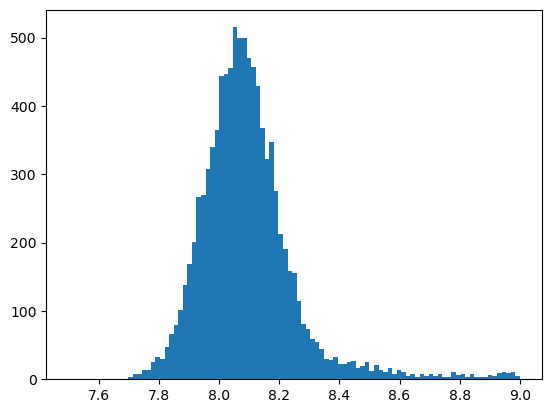

In [81]:
f, ax = plt.subplots()
ax.hist(12 + np.log10(OH), bins = np.linspace(7.5, 9.0, 100));

In [82]:
med = np.nanmedian(np.log10(OH))
std = np.nanstd(np.log10(OH))
q16 = np.nanquantile(np.log10(OH), 0.16)
q84 = np.nanquantile(np.log10(OH), 0.84)

print(f'12 + log(OH) = {12+med:.2f} +/- {std:.2f}')
print(f'12 + log(OH) = {12+med:.2f} + {q84-med:.2f} - {med-q16:.2f}')


12 + log(OH) = 8.08 +/- 0.27
12 + log(OH) = 8.08 + 0.15 - 0.12
